In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
from fredapi import Fred
from functools import reduce

fred = Fred(api_key="1de3881a1ba3927ad3faee8d127205a1")

series_dict = {
    'USREC': 'Recession',
    'GDPC1': 'GDP',
    'CPIAUCSL': 'CPI',
    'UNRATE': 'Unemployment',
    'FEDFUNDS': 'FedFunds',
    'INDPRO': 'IndustrialProduction',
    'M2SL': 'M2Money',
    'GS10': '10YrTreasury',
    'UMCSENT': 'Sentiment',
    'ICSA': 'JoblessClaims',
}

def expand_period_to_daily(df, col, freq='M'):
    df = df.copy()
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['PERIOD'] = df['DATE'].dt.to_period(freq)

    start = df['DATE'].min()
    end = pd.Timestamp.today().normalize()
    daily = pd.DataFrame({'DATE': pd.date_range(start=start, end=end, freq='D')})
    daily['PERIOD'] = daily['DATE'].dt.to_period(freq)

    merged = pd.merge(daily, df[['PERIOD', col]], on='PERIOD', how='left')
    return merged.drop(columns='PERIOD')

all_daily_frames = []
for sid, name in series_dict.items():
    raw = fred.get_series(sid).to_frame(name).reset_index()
    raw.columns = ['DATE', name]

    freq = 'Q' if 'GDP' in name else ('W' if 'JoblessClaims' in name else 'M')

    if sid in ['FEDFUNDS', 'GS10', 'USREC']:
        raw['DATE'] = pd.to_datetime(raw['DATE'])
        daily = pd.DataFrame({'DATE': pd.date_range(start=raw['DATE'].min(), end=pd.Timestamp.today(), freq='D')})
        merged = pd.merge(daily, raw, on='DATE', how='left').ffill()
    else:
        merged = expand_period_to_daily(raw, name, freq=freq)

    all_daily_frames.append(merged)

df_final = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='outer'), all_daily_frames)
df_final = df_final.sort_values('DATE').ffill()

print(df_final.head(10))
print(df_final.isna().sum())

        DATE  Recession  GDP  CPI  Unemployment  FedFunds  \
0 1854-12-01        1.0  NaN  NaN           NaN       NaN   
1 1854-12-02        1.0  NaN  NaN           NaN       NaN   
2 1854-12-03        1.0  NaN  NaN           NaN       NaN   
3 1854-12-04        1.0  NaN  NaN           NaN       NaN   
4 1854-12-05        1.0  NaN  NaN           NaN       NaN   
5 1854-12-06        1.0  NaN  NaN           NaN       NaN   
6 1854-12-07        1.0  NaN  NaN           NaN       NaN   
7 1854-12-08        1.0  NaN  NaN           NaN       NaN   
8 1854-12-09        1.0  NaN  NaN           NaN       NaN   
9 1854-12-10        1.0  NaN  NaN           NaN       NaN   

   IndustrialProduction  M2Money  10YrTreasury  Sentiment  JoblessClaims  
0                   NaN      NaN           NaN        NaN            NaN  
1                   NaN      NaN           NaN        NaN            NaN  
2                   NaN      NaN           NaN        NaN            NaN  
3                   NaN     

In [ ]:
min_start = pd.Timestamp("1980-01-01")

df_trimmed = df_final[df_final["DATE"] >= min_start].copy()
df_trimmed = df_trimmed.reset_index(drop=True)

print(df_trimmed.head())
print(df_trimmed.isna().sum())

        DATE  Recession       GDP   CPI  Unemployment  FedFunds  \
0 1980-01-01        0.0  7341.557  78.0           6.3     13.82   
1 1980-01-02        0.0  7341.557  78.0           6.3     13.82   
2 1980-01-03        0.0  7341.557  78.0           6.3     13.82   
3 1980-01-04        0.0  7341.557  78.0           6.3     13.82   
4 1980-01-05        0.0  7341.557  78.0           6.3     13.82   

   IndustrialProduction  M2Money  10YrTreasury  Sentiment  JoblessClaims  
0                51.944   1482.7          10.8       67.0       394000.0  
1                51.944   1482.7          10.8       67.0       394000.0  
2                51.944   1482.7          10.8       67.0       394000.0  
3                51.944   1482.7          10.8       67.0       394000.0  
4                51.944   1482.7          10.8       67.0       394000.0  
DATE                    0
Recession               0
GDP                     0
CPI                     0
Unemployment            0
FedFunds         

In [ ]:
df_trimmed.to_csv("us_recession_dataset.csv", index=False)

In [ ]:
total_rows = len(df_trimmed)
recession_count = df_trimmed["Recession"].sum()
recession_percent = (recession_count / total_rows) * 100

print(f" Total Rows: {total_rows}")
print(f" Recession Days (Recession = 1): {int(recession_count)}")
print(f" % of Recession Days: {recession_percent:.2f}%")

 Total Rows: 16652
 Recession Days (Recession = 1): 1764
 % of Recession Days: 10.59%


Epoch 1/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0980
Epoch 2/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0246
Epoch 3/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0172
Epoch 4/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0143
Epoch 5/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0120
Epoch 6/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0103
Epoch 7/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0086
Epoch 8/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0083
Epoch 9/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0076
Epoch 10/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0067
Epoch 11/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0076
Epoch 12/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0060
Epoch 13/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0055
Epoch 14/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0051
Epoch 15/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - lo

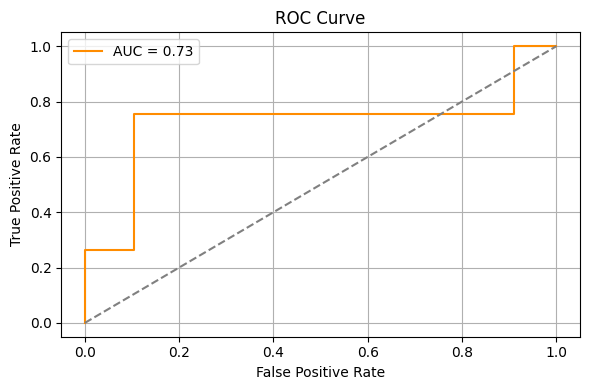

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    roc_auc_score, brier_score_loss, roc_curve
)
from keras.models import Sequential
from keras.layers import Dense
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

df = df_trimmed.copy()
X = df.drop(columns=["DATE", "Recession"])
y = df["Recession"].astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

split = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y[:split], y[split:]

# XG Boost

xgb = XGBRegressor(
    n_estimators=750,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)
xgb_preds = np.clip(xgb.predict(X_test), 0, 1)

# Neural Network

nn = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='mse')
nn.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)
nn_preds = nn.predict(X_test).flatten()

# ARIMA

arima = ARIMA(y_train, order=(3, 1, 2)).fit()
arima_preds = np.clip(arima.forecast(steps=len(y_test)), 0, 1)

# Ensemble (simple average)
ensemble_preds = (xgb_preds + nn_preds + arima_preds) / 3

# Evaluation
mae = mean_absolute_error(y_test, ensemble_preds)
mse = mean_squared_error(y_test, ensemble_preds)
rmse = sqrt(mse)
r2 = r2_score(y_test, ensemble_preds)
roc_auc = roc_auc_score(y_test, ensemble_preds)
brier = brier_score_loss(y_test, ensemble_preds)

print(" Ensemble Evaluation Metrics:")
print(f" MAE:         {mae:.4f}")
print(f" MSE:         {mse:.4f}")
print(f" RMSE:        {rmse:.4f}")
print(f" R² Score:    {r2:.4f}")
print(f" ROC AUC:     {roc_auc:.4f}")
print(f" Brier Score: {brier:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, ensemble_preds)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from tqdm import tqdm
warnings.filterwarnings("ignore")


window_size = 365 * 5
test_horizon = 30
df = df_trimmed.dropna().reset_index(drop=True)

all_preds = []
all_truths = []

for start in tqdm(range(0, len(df) - window_size - test_horizon, test_horizon)):
    train = df.iloc[start : start + window_size]
    test = df.iloc[start + window_size : start + window_size + test_horizon]

    X_train = train.drop(columns=["DATE", "Recession"])
    y_train = train["Recession"]
    X_test = test.drop(columns=["DATE", "Recession"])
    y_test = test["Recession"]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    xgb = XGBRegressor(
        n_estimators=750,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1,
        random_state=42
    )
    xgb.fit(X_train_scaled, y_train)
    xgb_preds = np.clip(xgb.predict(X_test_scaled), 0, 1)

    nn = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    nn.compile(optimizer='adam', loss='mse')
    nn.fit(X_train_scaled, y_train, epochs=30, verbose=0, batch_size=16)
    nn_preds = nn.predict(X_test_scaled).flatten()

    arima = ARIMA(y_train, order=(3, 1, 2)).fit()
    arima_preds = np.clip(arima.forecast(steps=len(y_test)), 0, 1)

    ensemble_preds = (xgb_preds + nn_preds + arima_preds) / 3
    all_preds.extend(ensemble_preds)
    all_truths.extend(y_test)

all_preds = np.clip(all_preds, 0, 1)
all_truths = np.array(all_truths)

mae = mean_absolute_error(all_truths, all_preds)
mse = mean_squared_error(all_truths, all_preds)
rmse = sqrt(mse)
r2 = r2_score(all_truths, all_preds)
roc_auc = roc_auc_score(all_truths, all_preds)
brier = brier_score_loss(all_truths, all_preds)

print("\n Rolling Backtest Metrics:")
print(f" MAE:         {mae:.4f}")
print(f" MSE:         {mse:.4f}")
print(f" RMSE:        {rmse:.4f}")
print(f" R² Score:    {r2:.4f}")
print(f" ROC AUC:     {roc_auc:.4f}")
print(f" Brier Score: {brier:.4f}")


  0%|          | 0/494 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  0%|          | 1/494 [00:11<1:36:46, 11.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  0%|          | 2/494 [00:23<1:37:55, 11.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  1%|          | 3/494 [01:29<4:56:58, 36.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  1%|          | 4/494 [01:41<3:38:22, 26.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  1%|          | 5/494 [01:53<2:54:44, 21.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  1%|          | 6/494 [02:04<2:27:05, 18.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  1%|▏         | 7/494 [02:16<2:08:55, 15.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|▏         | 8/494 [02:27<1:58:01, 14.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  2%|▏         | 9/494 [02:43<2:01:02, 14.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  2%|▏         | 10/494 [02:55<1:52:04, 13.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  2%|▏         | 11/494 [03:07<1:46:43, 13.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  2%|▏         | 12/494 [03:19<1:44:39, 13.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  3%|▎         | 13/494 [03:31<1:42:32, 12.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  3%|▎         | 14/494 [03:43<1:39:41, 12.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  3%|▎         | 15/494 [03:55<1:37:58, 12.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  3%|▎         | 16/494 [04:06<1:35:53, 12.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 17/494 [04:18<1:35:45, 12.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 18/494 [04:30<1:35:19, 12.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 19/494 [04:43<1:36:39, 12.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  4%|▍         | 20/494 [04:55<1:35:45, 12.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  4%|▍         | 21/494 [05:06<1:33:38, 11.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  4%|▍         | 22/494 [05:18<1:33:51, 11.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  5%|▍         | 23/494 [05:30<1:32:29, 11.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▍         | 24/494 [05:43<1:35:14, 12.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 25/494 [05:55<1:34:34, 12.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▌         | 26/494 [06:07<1:33:53, 12.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  5%|▌         | 27/494 [06:18<1:32:22, 11.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  6%|▌         | 28/494 [06:30<1:32:05, 11.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 29/494 [06:40<1:28:34, 11.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 30/494 [06:52<1:29:36, 11.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▋         | 31/494 [07:04<1:29:54, 11.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  6%|▋         | 32/494 [07:16<1:29:23, 11.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  7%|▋         | 33/494 [07:27<1:29:00, 11.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  7%|▋         | 34/494 [07:39<1:29:42, 11.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  7%|▋         | 35/494 [07:51<1:29:53, 11.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  7%|▋         | 36/494 [08:03<1:30:24, 11.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  7%|▋         | 37/494 [08:16<1:31:46, 12.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  8%|▊         | 38/494 [08:28<1:32:07, 12.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  8%|▊         | 39/494 [08:40<1:31:59, 12.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  8%|▊         | 40/494 [08:52<1:32:21, 12.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  8%|▊         | 41/494 [09:05<1:32:22, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  9%|▊         | 42/494 [09:17<1:32:09, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  9%|▊         | 43/494 [09:30<1:33:15, 12.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  9%|▉         | 44/494 [09:42<1:32:51, 12.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  9%|▉         | 45/494 [09:54<1:32:34, 12.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  9%|▉         | 46/494 [10:07<1:33:31, 12.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 10%|▉         | 47/494 [10:20<1:33:22, 12.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 10%|▉         | 48/494 [10:32<1:32:28, 12.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|▉         | 49/494 [10:46<1:36:26, 13.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 10%|█         | 50/494 [10:59<1:35:24, 12.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 51/494 [11:11<1:34:04, 12.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 52/494 [11:24<1:32:40, 12.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 53/494 [11:36<1:32:06, 12.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 11%|█         | 54/494 [11:48<1:31:13, 12.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 11%|█         | 55/494 [12:01<1:30:48, 12.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█▏        | 56/494 [12:13<1:30:52, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 57/494 [12:25<1:30:06, 12.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 58/494 [12:38<1:30:39, 12.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 59/494 [12:54<1:38:40, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 60/494 [13:07<1:37:07, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 12%|█▏        | 61/494 [13:21<1:37:28, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 13%|█▎        | 62/494 [13:35<1:37:35, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 13%|█▎        | 63/494 [13:48<1:36:19, 13.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 64/494 [14:01<1:35:27, 13.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|█▎        | 65/494 [14:14<1:33:54, 13.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 13%|█▎        | 66/494 [14:27<1:33:31, 13.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▎        | 67/494 [14:39<1:32:23, 12.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|█▍        | 68/494 [14:52<1:31:07, 12.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 69/494 [15:04<1:30:30, 12.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▍        | 70/494 [15:16<1:27:07, 12.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▍        | 71/494 [15:28<1:26:19, 12.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▍        | 72/494 [15:39<1:23:56, 11.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 73/494 [15:50<1:22:39, 11.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 15%|█▍        | 74/494 [16:02<1:21:25, 11.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 75/494 [16:13<1:21:13, 11.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▌        | 76/494 [16:25<1:21:17, 11.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 77/494 [16:37<1:21:07, 11.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▌        | 78/494 [16:51<1:25:34, 12.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 79/494 [17:02<1:23:28, 12.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 80/494 [17:13<1:21:17, 11.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▋        | 81/494 [17:25<1:20:46, 11.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 82/494 [17:36<1:19:39, 11.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 83/494 [17:47<1:19:00, 11.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 84/494 [18:00<1:19:51, 11.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 17%|█▋        | 85/494 [18:11<1:18:54, 11.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 86/494 [18:23<1:19:07, 11.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 87/494 [18:34<1:19:21, 11.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 88/494 [18:46<1:18:21, 11.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 18%|█▊        | 89/494 [18:58<1:20:02, 11.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 18%|█▊        | 90/494 [19:09<1:17:56, 11.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 18%|█▊        | 91/494 [19:21<1:17:25, 11.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 19%|█▊        | 92/494 [19:32<1:17:02, 11.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 93/494 [19:44<1:17:36, 11.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 19%|█▉        | 94/494 [19:57<1:19:31, 11.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 95/494 [20:09<1:21:06, 12.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 19%|█▉        | 96/494 [20:22<1:22:14, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 97/494 [20:36<1:24:42, 12.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 20%|█▉        | 98/494 [20:48<1:22:03, 12.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|██        | 99/494 [20:59<1:20:29, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 20%|██        | 100/494 [21:11<1:18:10, 11.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|██        | 101/494 [21:22<1:17:39, 11.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 102/494 [21:34<1:17:32, 11.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 103/494 [21:46<1:18:04, 11.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 104/494 [21:59<1:18:36, 12.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██▏       | 105/494 [22:11<1:19:15, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 21%|██▏       | 106/494 [22:23<1:18:04, 12.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 107/494 [22:34<1:15:31, 11.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 22%|██▏       | 108/494 [22:45<1:14:40, 11.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 22%|██▏       | 109/494 [22:56<1:13:24, 11.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 110/494 [23:07<1:11:49, 11.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 22%|██▏       | 111/494 [23:18<1:10:38, 11.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|██▎       | 112/494 [23:29<1:10:32, 11.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 113/494 [23:42<1:14:45, 11.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 114/494 [23:54<1:13:56, 11.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 115/494 [24:05<1:13:46, 11.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 23%|██▎       | 116/494 [24:17<1:13:32, 11.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 24%|██▎       | 117/494 [24:28<1:12:01, 11.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 118/494 [24:39<1:11:41, 11.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 24%|██▍       | 119/494 [24:50<1:10:43, 11.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 24%|██▍       | 120/494 [25:02<1:11:01, 11.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 24%|██▍       | 121/494 [25:13<1:10:12, 11.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|██▍       | 122/494 [25:25<1:10:32, 11.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 25%|██▍       | 123/494 [25:35<1:07:52, 10.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 25%|██▌       | 124/494 [25:45<1:07:27, 10.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 25%|██▌       | 125/494 [25:56<1:06:45, 10.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 26%|██▌       | 126/494 [26:07<1:07:22, 10.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 26%|██▌       | 127/494 [26:20<1:09:21, 11.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 26%|██▌       | 128/494 [26:31<1:09:50, 11.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 26%|██▌       | 129/494 [26:43<1:09:51, 11.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 26%|██▋       | 130/494 [26:54<1:09:08, 11.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 27%|██▋       | 131/494 [27:06<1:09:56, 11.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 27%|██▋       | 132/494 [27:18<1:10:40, 11.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 27%|██▋       | 133/494 [27:29<1:09:11, 11.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 27%|██▋       | 134/494 [27:41<1:09:36, 11.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 27%|██▋       | 135/494 [27:54<1:11:39, 11.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 28%|██▊       | 136/494 [28:05<1:10:34, 11.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 28%|██▊       | 137/494 [28:16<1:08:55, 11.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 28%|██▊       | 138/494 [28:28<1:09:48, 11.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 28%|██▊       | 139/494 [28:41<1:10:15, 11.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 28%|██▊       | 140/494 [28:52<1:09:29, 11.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 29%|██▊       | 141/494 [29:05<1:10:26, 11.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 29%|██▊       | 142/494 [29:17<1:10:59, 12.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 29%|██▉       | 143/494 [29:29<1:11:00, 12.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 144/494 [29:41<1:10:34, 12.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 29%|██▉       | 145/494 [29:54<1:11:19, 12.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 30%|██▉       | 146/494 [30:06<1:10:52, 12.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 30%|██▉       | 147/494 [30:18<1:10:41, 12.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 30%|██▉       | 148/494 [30:30<1:09:55, 12.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 149/494 [30:42<1:09:35, 12.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 30%|███       | 150/494 [30:54<1:09:25, 12.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 31%|███       | 151/494 [31:07<1:10:00, 12.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 31%|███       | 152/494 [31:19<1:10:10, 12.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 153/494 [31:33<1:12:05, 12.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 154/494 [31:47<1:14:43, 13.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███▏      | 155/494 [32:02<1:16:45, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 156/494 [32:15<1:16:47, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 32%|███▏      | 157/494 [32:29<1:16:42, 13.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 158/494 [32:42<1:15:17, 13.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 32%|███▏      | 159/494 [32:55<1:13:52, 13.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 32%|███▏      | 160/494 [33:08<1:13:17, 13.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 161/494 [33:20<1:11:28, 12.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 33%|███▎      | 162/494 [33:32<1:10:23, 12.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 163/494 [33:46<1:11:24, 12.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 33%|███▎      | 164/494 [34:00<1:13:35, 13.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 33%|███▎      | 165/494 [34:13<1:12:21, 13.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▎      | 166/494 [34:26<1:12:32, 13.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 167/494 [34:39<1:11:27, 13.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 168/494 [34:53<1:12:58, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 169/494 [35:07<1:13:36, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 34%|███▍      | 170/494 [35:23<1:17:26, 14.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 35%|███▍      | 171/494 [35:38<1:17:00, 14.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 35%|███▍      | 172/494 [35:51<1:14:58, 13.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 35%|███▌      | 173/494 [36:03<1:12:22, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 35%|███▌      | 174/494 [36:15<1:09:44, 13.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 35%|███▌      | 175/494 [36:28<1:08:17, 12.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 36%|███▌      | 176/494 [36:40<1:07:29, 12.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 36%|███▌      | 177/494 [36:53<1:06:41, 12.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 36%|███▌      | 178/494 [37:05<1:06:51, 12.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 179/494 [37:19<1:07:21, 12.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 36%|███▋      | 180/494 [37:32<1:07:43, 12.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 37%|███▋      | 181/494 [37:44<1:07:06, 12.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 37%|███▋      | 182/494 [37:58<1:07:29, 12.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 37%|███▋      | 183/494 [38:09<1:04:32, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 37%|███▋      | 184/494 [38:21<1:03:45, 12.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 37%|███▋      | 185/494 [38:33<1:03:00, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 38%|███▊      | 186/494 [38:45<1:02:06, 12.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 187/494 [38:57<1:02:21, 12.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 38%|███▊      | 188/494 [39:10<1:02:29, 12.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 38%|███▊      | 189/494 [39:22<1:01:53, 12.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 38%|███▊      | 190/494 [39:34<1:01:52, 12.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 39%|███▊      | 191/494 [39:46<1:01:25, 12.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 39%|███▉      | 192/494 [39:58<1:00:28, 12.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 39%|███▉      | 193/494 [40:10<1:00:23, 12.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 39%|███▉      | 194/494 [40:22<1:00:18, 12.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 39%|███▉      | 195/494 [40:34<1:00:20, 12.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 40%|███▉      | 196/494 [40:46<1:00:31, 12.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 40%|███▉      | 197/494 [40:59<1:00:39, 12.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 198/494 [41:11<1:00:06, 12.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 40%|████      | 199/494 [41:22<58:36, 11.92s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 200/494 [41:36<1:01:25, 12.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 41%|████      | 201/494 [41:48<59:53, 12.27s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 41%|████      | 202/494 [41:59<58:55, 12.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 41%|████      | 203/494 [42:11<58:05, 11.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 41%|████▏     | 204/494 [42:23<57:24, 11.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 41%|████▏     | 205/494 [42:34<56:36, 11.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 42%|████▏     | 206/494 [42:46<56:05, 11.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 42%|████▏     | 207/494 [42:58<56:12, 11.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 42%|████▏     | 208/494 [43:09<55:50, 11.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 42%|████▏     | 209/494 [43:20<54:54, 11.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 43%|████▎     | 210/494 [43:32<55:07, 11.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 43%|████▎     | 211/494 [43:44<55:24, 11.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 43%|████▎     | 212/494 [43:56<54:38, 11.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 213/494 [44:07<54:08, 11.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 43%|████▎     | 214/494 [44:20<55:30, 11.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 44%|████▎     | 215/494 [44:30<52:58, 11.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 44%|████▎     | 216/494 [44:41<52:06, 11.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 44%|████▍     | 217/494 [44:52<51:47, 11.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 44%|████▍     | 218/494 [45:03<51:24, 11.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 44%|████▍     | 219/494 [45:14<51:22, 11.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 45%|████▍     | 220/494 [45:26<51:31, 11.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 45%|████▍     | 221/494 [45:38<52:09, 11.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|████▍     | 222/494 [45:50<52:26, 11.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 45%|████▌     | 223/494 [46:01<52:15, 11.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 45%|████▌     | 224/494 [46:12<51:29, 11.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▌     | 225/494 [46:24<51:14, 11.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 226/494 [46:35<51:17, 11.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▌     | 227/494 [46:47<51:44, 11.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 46%|████▌     | 228/494 [46:58<49:53, 11.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 46%|████▋     | 229/494 [47:09<49:37, 11.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 47%|████▋     | 230/494 [47:20<49:41, 11.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 47%|████▋     | 231/494 [47:32<49:34, 11.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 47%|████▋     | 232/494 [47:43<49:27, 11.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 47%|████▋     | 233/494 [47:54<48:40, 11.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 47%|████▋     | 234/494 [48:05<48:33, 11.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 48%|████▊     | 235/494 [48:16<48:20, 11.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 236/494 [48:28<48:35, 11.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 48%|████▊     | 237/494 [48:38<47:19, 11.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 48%|████▊     | 238/494 [48:50<47:39, 11.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 48%|████▊     | 239/494 [49:01<47:57, 11.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 49%|████▊     | 240/494 [49:13<48:12, 11.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 49%|████▉     | 241/494 [49:24<48:13, 11.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 49%|████▉     | 242/494 [49:36<47:59, 11.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 49%|████▉     | 243/494 [49:48<48:26, 11.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 49%|████▉     | 244/494 [49:59<48:07, 11.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 50%|████▉     | 245/494 [50:11<48:21, 11.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 50%|████▉     | 246/494 [50:23<47:57, 11.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 50%|█████     | 247/494 [50:35<48:06, 11.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 50%|█████     | 248/494 [50:46<47:37, 11.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 50%|█████     | 249/494 [50:57<47:11, 11.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 51%|█████     | 250/494 [51:09<46:43, 11.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 51%|█████     | 251/494 [51:19<45:19, 11.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 51%|█████     | 252/494 [51:31<45:36, 11.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 51%|█████     | 253/494 [51:42<45:16, 11.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 51%|█████▏    | 254/494 [51:53<45:05, 11.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 52%|█████▏    | 255/494 [52:08<49:17, 12.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 52%|█████▏    | 256/494 [52:20<47:53, 12.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 52%|█████▏    | 257/494 [52:31<47:24, 12.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 52%|█████▏    | 258/494 [52:43<46:36, 11.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 52%|█████▏    | 259/494 [52:54<45:54, 11.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 53%|█████▎    | 260/494 [53:06<45:50, 11.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 53%|█████▎    | 261/494 [53:19<46:29, 11.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 53%|█████▎    | 262/494 [53:30<45:47, 11.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 53%|█████▎    | 263/494 [53:42<45:41, 11.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 53%|█████▎    | 264/494 [53:55<46:21, 12.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 54%|█████▎    | 265/494 [54:07<46:16, 12.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 54%|█████▍    | 266/494 [54:19<45:39, 12.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 54%|█████▍    | 267/494 [54:30<45:13, 11.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 54%|█████▍    | 268/494 [54:43<46:12, 12.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 54%|█████▍    | 269/494 [54:56<46:05, 12.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 55%|█████▍    | 270/494 [55:09<46:27, 12.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 55%|█████▍    | 271/494 [55:21<46:05, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 55%|█████▌    | 272/494 [55:33<45:48, 12.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 55%|█████▌    | 273/494 [55:46<45:27, 12.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 55%|█████▌    | 274/494 [55:58<45:11, 12.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 56%|█████▌    | 275/494 [56:11<45:31, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 56%|█████▌    | 276/494 [56:23<45:27, 12.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 56%|█████▌    | 277/494 [56:36<45:13, 12.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 56%|█████▋    | 278/494 [56:49<45:43, 12.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 56%|█████▋    | 279/494 [57:02<46:22, 12.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 57%|█████▋    | 280/494 [57:16<46:46, 13.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 57%|█████▋    | 281/494 [57:29<46:37, 13.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 57%|█████▋    | 282/494 [57:42<45:47, 12.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 57%|█████▋    | 283/494 [57:53<44:01, 12.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 57%|█████▋    | 284/494 [58:05<42:37, 12.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 58%|█████▊    | 285/494 [58:16<41:58, 12.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 58%|█████▊    | 286/494 [58:28<41:07, 11.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 58%|█████▊    | 287/494 [58:40<40:57, 11.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 58%|█████▊    | 288/494 [58:51<40:15, 11.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 59%|█████▊    | 289/494 [59:02<39:26, 11.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 59%|█████▊    | 290/494 [59:13<38:32, 11.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 59%|█████▉    | 291/494 [59:25<38:37, 11.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 59%|█████▉    | 292/494 [59:36<38:25, 11.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 59%|█████▉    | 293/494 [59:48<38:57, 11.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 60%|█████▉    | 294/494 [1:00:02<40:52, 12.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 60%|█████▉    | 295/494 [1:00:15<41:08, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 60%|█████▉    | 296/494 [1:00:26<40:10, 12.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 60%|██████    | 297/494 [1:00:40<41:32, 12.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 60%|██████    | 298/494 [1:00:52<40:22, 12.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 61%|██████    | 299/494 [1:01:03<39:21, 12.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 61%|██████    | 300/494 [1:01:15<38:39, 11.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 61%|██████    | 301/494 [1:01:26<37:55, 11.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 61%|██████    | 302/494 [1:01:37<37:17, 11.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 61%|██████▏   | 303/494 [1:01:49<37:22, 11.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 62%|██████▏   | 304/494 [1:02:01<37:17, 11.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 62%|██████▏   | 305/494 [1:02:13<36:49, 11.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 62%|██████▏   | 306/494 [1:02:25<37:08, 11.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 62%|██████▏   | 307/494 [1:02:36<36:28, 11.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 62%|██████▏   | 308/494 [1:02:48<35:55, 11.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 63%|██████▎   | 309/494 [1:02:59<35:26, 11.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 63%|██████▎   | 310/494 [1:03:10<35:16, 11.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 63%|██████▎   | 311/494 [1:03:21<34:37, 11.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 63%|██████▎   | 312/494 [1:03:33<34:29, 11.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 63%|██████▎   | 313/494 [1:03:44<34:11, 11.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 64%|██████▎   | 314/494 [1:03:56<34:10, 11.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 64%|██████▍   | 315/494 [1:04:07<34:02, 11.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 64%|██████▍   | 316/494 [1:04:19<33:51, 11.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 64%|██████▍   | 317/494 [1:04:31<34:14, 11.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 64%|██████▍   | 318/494 [1:04:42<33:36, 11.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 65%|██████▍   | 319/494 [1:04:57<36:51, 12.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 65%|██████▍   | 320/494 [1:05:09<36:10, 12.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 65%|██████▍   | 321/494 [1:05:21<35:48, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 65%|██████▌   | 322/494 [1:05:34<35:30, 12.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 65%|██████▌   | 323/494 [1:05:48<36:50, 12.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 66%|██████▌   | 324/494 [1:06:01<37:02, 13.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 66%|██████▌   | 325/494 [1:06:13<35:48, 12.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 66%|██████▌   | 326/494 [1:06:25<34:41, 12.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 66%|██████▌   | 327/494 [1:06:37<33:55, 12.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 66%|██████▋   | 328/494 [1:06:49<34:00, 12.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 67%|██████▋   | 329/494 [1:07:01<33:21, 12.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 67%|██████▋   | 330/494 [1:07:12<32:34, 11.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 67%|██████▋   | 331/494 [1:07:24<32:05, 11.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 67%|██████▋   | 332/494 [1:07:35<31:36, 11.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 67%|██████▋   | 333/494 [1:07:47<31:14, 11.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 68%|██████▊   | 334/494 [1:07:58<30:57, 11.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 68%|██████▊   | 335/494 [1:08:10<30:34, 11.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 68%|██████▊   | 336/494 [1:08:22<30:54, 11.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 68%|██████▊   | 337/494 [1:08:34<30:38, 11.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 68%|██████▊   | 338/494 [1:08:44<29:27, 11.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 69%|██████▊   | 339/494 [1:08:55<29:15, 11.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 69%|██████▉   | 340/494 [1:09:07<29:09, 11.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 69%|██████▉   | 341/494 [1:09:18<28:56, 11.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 69%|██████▉   | 342/494 [1:09:30<29:28, 11.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 69%|██████▉   | 343/494 [1:09:42<29:15, 11.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 70%|██████▉   | 344/494 [1:09:54<29:12, 11.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 70%|██████▉   | 345/494 [1:10:06<29:08, 11.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 70%|███████   | 346/494 [1:10:17<28:58, 11.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 70%|███████   | 347/494 [1:10:30<28:59, 11.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 70%|███████   | 348/494 [1:10:42<29:12, 12.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 71%|███████   | 349/494 [1:10:54<29:24, 12.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 71%|███████   | 350/494 [1:11:06<28:42, 11.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 71%|███████   | 351/494 [1:11:17<28:08, 11.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 71%|███████▏  | 352/494 [1:11:29<27:41, 11.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 71%|███████▏  | 353/494 [1:11:40<27:06, 11.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 72%|███████▏  | 354/494 [1:11:52<27:06, 11.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 72%|███████▏  | 355/494 [1:12:03<26:29, 11.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 72%|███████▏  | 356/494 [1:12:15<26:36, 11.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 72%|███████▏  | 357/494 [1:12:26<26:10, 11.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 72%|███████▏  | 358/494 [1:12:37<25:42, 11.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 73%|███████▎  | 359/494 [1:12:48<25:09, 11.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 73%|███████▎  | 360/494 [1:12:59<24:52, 11.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 73%|███████▎  | 361/494 [1:13:11<25:31, 11.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 73%|███████▎  | 362/494 [1:13:23<25:42, 11.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 73%|███████▎  | 363/494 [1:13:36<25:54, 11.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 74%|███████▎  | 364/494 [1:13:50<27:13, 12.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 74%|███████▍  | 365/494 [1:14:02<27:00, 12.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 74%|███████▍  | 366/494 [1:14:15<26:43, 12.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 74%|███████▍  | 367/494 [1:14:27<26:13, 12.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 74%|███████▍  | 368/494 [1:14:39<26:05, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 75%|███████▍  | 369/494 [1:14:52<25:50, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 75%|███████▍  | 370/494 [1:15:04<25:16, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 75%|███████▌  | 371/494 [1:15:16<25:04, 12.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 75%|███████▌  | 372/494 [1:15:28<25:00, 12.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 76%|███████▌  | 373/494 [1:15:41<24:49, 12.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 76%|███████▌  | 374/494 [1:15:53<24:31, 12.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 76%|███████▌  | 375/494 [1:16:05<24:20, 12.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 76%|███████▌  | 376/494 [1:16:17<24:12, 12.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 76%|███████▋  | 377/494 [1:16:30<23:58, 12.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 77%|███████▋  | 378/494 [1:16:42<23:47, 12.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 77%|███████▋  | 379/494 [1:16:55<23:45, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 77%|███████▋  | 380/494 [1:17:07<23:36, 12.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 77%|███████▋  | 381/494 [1:17:19<23:13, 12.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 77%|███████▋  | 382/494 [1:17:31<22:48, 12.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 78%|███████▊  | 383/494 [1:17:44<22:49, 12.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 78%|███████▊  | 384/494 [1:17:56<22:33, 12.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 78%|███████▊  | 385/494 [1:18:09<22:36, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 78%|███████▊  | 386/494 [1:18:21<22:19, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 78%|███████▊  | 387/494 [1:18:34<22:09, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 79%|███████▊  | 388/494 [1:18:46<22:09, 12.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 79%|███████▊  | 389/494 [1:18:59<21:49, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 79%|███████▉  | 390/494 [1:19:11<21:26, 12.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 79%|███████▉  | 391/494 [1:19:23<21:06, 12.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 79%|███████▉  | 392/494 [1:19:35<20:48, 12.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 80%|███████▉  | 393/494 [1:19:47<20:34, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 80%|███████▉  | 394/494 [1:20:00<20:23, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 80%|███████▉  | 395/494 [1:20:12<20:15, 12.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 80%|████████  | 396/494 [1:20:30<23:08, 14.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 80%|████████  | 397/494 [1:20:43<22:17, 13.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 81%|████████  | 398/494 [1:20:56<21:32, 13.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 81%|████████  | 399/494 [1:21:09<20:55, 13.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 81%|████████  | 400/494 [1:21:21<20:18, 12.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 81%|████████  | 401/494 [1:21:33<19:47, 12.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 81%|████████▏ | 402/494 [1:21:47<20:01, 13.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 82%|████████▏ | 403/494 [1:22:01<20:10, 13.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 82%|████████▏ | 404/494 [1:22:14<19:39, 13.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 82%|████████▏ | 405/494 [1:22:26<19:05, 12.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 82%|████████▏ | 406/494 [1:22:38<18:41, 12.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 82%|████████▏ | 407/494 [1:22:51<18:25, 12.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 83%|████████▎ | 408/494 [1:23:04<18:13, 12.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 83%|████████▎ | 409/494 [1:23:17<18:10, 12.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 83%|████████▎ | 410/494 [1:23:31<18:33, 13.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 83%|████████▎ | 411/494 [1:23:45<18:39, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 83%|████████▎ | 412/494 [1:23:58<18:11, 13.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 84%|████████▎ | 413/494 [1:24:11<17:45, 13.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 84%|████████▍ | 414/494 [1:24:24<17:19, 13.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 84%|████████▍ | 415/494 [1:24:36<17:02, 12.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 84%|████████▍ | 416/494 [1:24:49<16:34, 12.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 84%|████████▍ | 417/494 [1:25:01<16:21, 12.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 85%|████████▍ | 418/494 [1:25:14<15:56, 12.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 85%|████████▍ | 419/494 [1:25:26<15:41, 12.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 85%|████████▌ | 420/494 [1:25:38<15:25, 12.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 85%|████████▌ | 421/494 [1:25:51<15:18, 12.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 85%|████████▌ | 422/494 [1:26:04<15:05, 12.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 86%|████████▌ | 423/494 [1:26:16<14:42, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 86%|████████▌ | 424/494 [1:26:28<14:18, 12.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 86%|████████▌ | 425/494 [1:26:40<14:06, 12.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 86%|████████▌ | 426/494 [1:26:52<13:46, 12.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 86%|████████▋ | 427/494 [1:27:05<13:45, 12.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 87%|████████▋ | 428/494 [1:27:18<13:48, 12.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 87%|████████▋ | 429/494 [1:27:30<13:38, 12.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 87%|████████▋ | 430/494 [1:27:42<13:00, 12.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 87%|████████▋ | 431/494 [1:27:53<12:35, 11.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 87%|████████▋ | 432/494 [1:28:05<12:16, 11.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 88%|████████▊ | 433/494 [1:28:17<12:02, 11.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 88%|████████▊ | 434/494 [1:28:28<11:46, 11.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 88%|████████▊ | 435/494 [1:28:40<11:28, 11.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 88%|████████▊ | 436/494 [1:28:51<11:11, 11.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 88%|████████▊ | 437/494 [1:29:02<10:56, 11.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 89%|████████▊ | 438/494 [1:29:14<10:46, 11.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 89%|████████▉ | 439/494 [1:29:26<10:38, 11.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 89%|████████▉ | 440/494 [1:29:37<10:16, 11.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 89%|████████▉ | 441/494 [1:29:47<09:52, 11.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 89%|████████▉ | 442/494 [1:29:59<09:42, 11.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 90%|████████▉ | 443/494 [1:30:10<09:30, 11.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 90%|████████▉ | 444/494 [1:30:21<09:17, 11.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 90%|█████████ | 445/494 [1:30:32<09:12, 11.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 90%|█████████ | 446/494 [1:30:44<09:04, 11.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 90%|█████████ | 447/494 [1:30:55<08:49, 11.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 91%|█████████ | 448/494 [1:31:06<08:31, 11.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 91%|█████████ | 449/494 [1:31:17<08:19, 11.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 91%|█████████ | 450/494 [1:31:27<08:03, 10.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 91%|█████████▏| 451/494 [1:31:38<07:45, 10.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 91%|█████████▏| 452/494 [1:31:49<07:38, 10.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 92%|█████████▏| 453/494 [1:32:00<07:31, 11.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 92%|█████████▏| 454/494 [1:32:11<07:23, 11.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 92%|█████████▏| 455/494 [1:32:23<07:13, 11.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 92%|█████████▏| 456/494 [1:32:35<07:15, 11.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 93%|█████████▎| 457/494 [1:32:47<07:06, 11.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 93%|█████████▎| 458/494 [1:32:58<06:50, 11.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 93%|█████████▎| 459/494 [1:33:09<06:35, 11.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 93%|█████████▎| 460/494 [1:33:20<06:26, 11.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 93%|█████████▎| 461/494 [1:33:31<06:11, 11.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 94%|█████████▎| 462/494 [1:33:43<06:00, 11.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 94%|█████████▎| 463/494 [1:33:54<05:50, 11.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 94%|█████████▍| 464/494 [1:34:04<05:25, 10.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 94%|█████████▍| 465/494 [1:34:15<05:19, 11.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 94%|█████████▍| 466/494 [1:34:26<05:09, 11.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 95%|█████████▍| 467/494 [1:34:38<05:02, 11.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 95%|█████████▍| 468/494 [1:34:50<04:55, 11.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 95%|█████████▍| 469/494 [1:35:02<04:48, 11.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 95%|█████████▌| 470/494 [1:35:13<04:37, 11.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 95%|█████████▌| 471/494 [1:35:25<04:26, 11.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 96%|█████████▌| 472/494 [1:35:36<04:14, 11.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 96%|█████████▌| 473/494 [1:35:48<04:02, 11.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 96%|█████████▌| 474/494 [1:35:59<03:46, 11.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 96%|█████████▌| 475/494 [1:36:10<03:33, 11.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 96%|█████████▋| 476/494 [1:36:21<03:23, 11.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 97%|█████████▋| 477/494 [1:36:32<03:11, 11.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 97%|█████████▋| 478/494 [1:36:44<03:01, 11.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 97%|█████████▋| 479/494 [1:36:54<02:45, 11.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 97%|█████████▋| 480/494 [1:37:06<02:36, 11.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 97%|█████████▋| 481/494 [1:37:17<02:25, 11.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 98%|█████████▊| 482/494 [1:37:28<02:14, 11.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 98%|█████████▊| 483/494 [1:37:40<02:04, 11.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 98%|█████████▊| 484/494 [1:37:51<01:53, 11.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 98%|█████████▊| 485/494 [1:38:08<01:57, 13.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|█████████▊| 486/494 [1:38:20<01:41, 12.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 99%|█████████▊| 487/494 [1:38:32<01:26, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 99%|█████████▉| 488/494 [1:38:43<01:12, 12.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 99%|█████████▉| 489/494 [1:38:55<01:00, 12.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 99%|█████████▉| 490/494 [1:39:07<00:47, 11.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 99%|█████████▉| 491/494 [1:39:19<00:35, 11.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


100%|█████████▉| 492/494 [1:39:32<00:24, 12.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


100%|█████████▉| 493/494 [1:39:45<00:12, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


100%|██████████| 494/494 [1:39:57<00:00, 12.14s/it]


 Rolling Backtest Metrics:
 MAE:         0.0190
 MSE:         0.0143
 RMSE:        0.1194
 R² Score:    0.7916
 ROC AUC:     0.9529
 Brier Score: 0.0143


<Figure size 500x400 with 0 Axes>

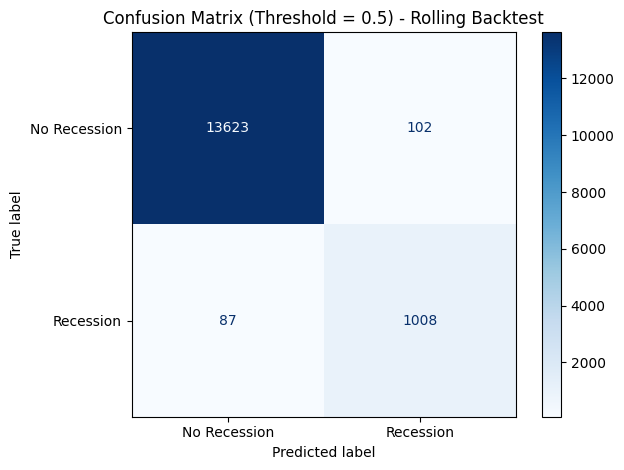

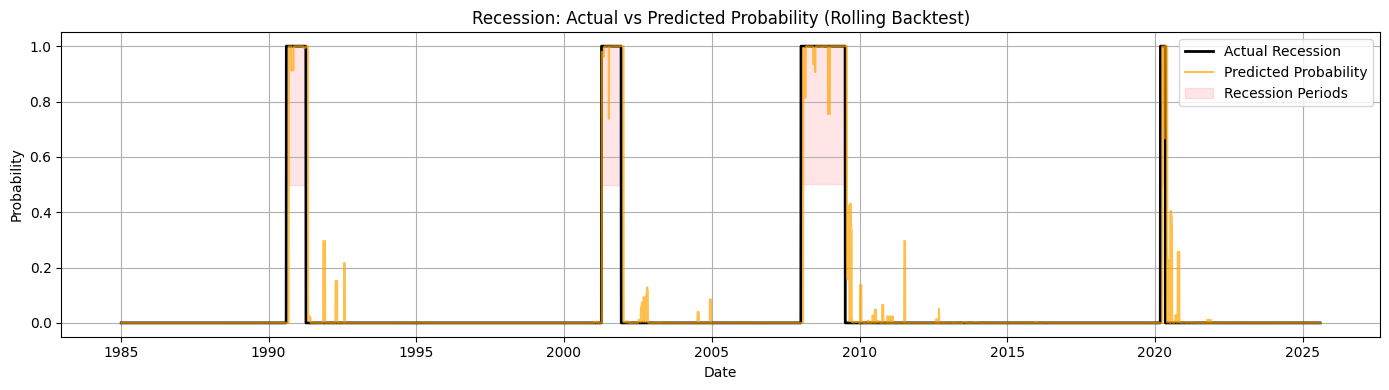

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap
import seaborn as sns
import matplotlib.pyplot as plt


threshold = 0.5
ensemble_binary_backtest = (all_preds >= threshold).astype(int)
y_true_binary_backtest = np.array(all_truths).astype(int)

cm_backtest = confusion_matrix(y_true_binary_backtest, ensemble_binary_backtest)
disp_backtest = ConfusionMatrixDisplay(confusion_matrix=cm_backtest, display_labels=["No Recession", "Recession"])

plt.figure(figsize=(5, 4))
disp_backtest.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix (Threshold = 0.5) - Rolling Backtest")
plt.grid(False)
plt.tight_layout()
plt.show()


dates_backtest = df_trimmed.dropna().reset_index(drop=True)["DATE"].iloc[-len(all_truths):].reset_index(drop=True)


plt.figure(figsize=(14, 4))
plt.plot(dates_backtest, all_truths, label="Actual Recession", color="black", linewidth=2)
plt.plot(dates_backtest, all_preds, label="Predicted Probability", color="orange", alpha=0.7)
plt.fill_between(dates_backtest, 0.5, 1, where=all_truths == 1, color="red", alpha=0.1, label="Recession Periods")
plt.title("Recession: Actual vs Predicted Probability (Rolling Backtest)")
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()